#RunWalk Marathons

I have completed 5 marathons using run/walk and at this time don't plan to do any more of them. Half Marathons are much easier to train for. 

Lately I've been learning how to use [Numpy](http://www.numpy.org) and [Matplotlib](http://matplotlib.org). Here are some examples. 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from django.contrib.gis.measure import D
from rw import database
db = database()

In [5]:
dates = {
    '2011-10-16': 'Columbus 2011',
    '2012-10-21': 'Columbus 2012',
    '2012-11-10': 'Richmond 2012',
    '2013-10-13': 'Steamtown 2013',
    '2013-12-01': 'Seattle 2013',
}
races = {name: db.get_race_by_date(date).tcx for date, name in dates.items()}

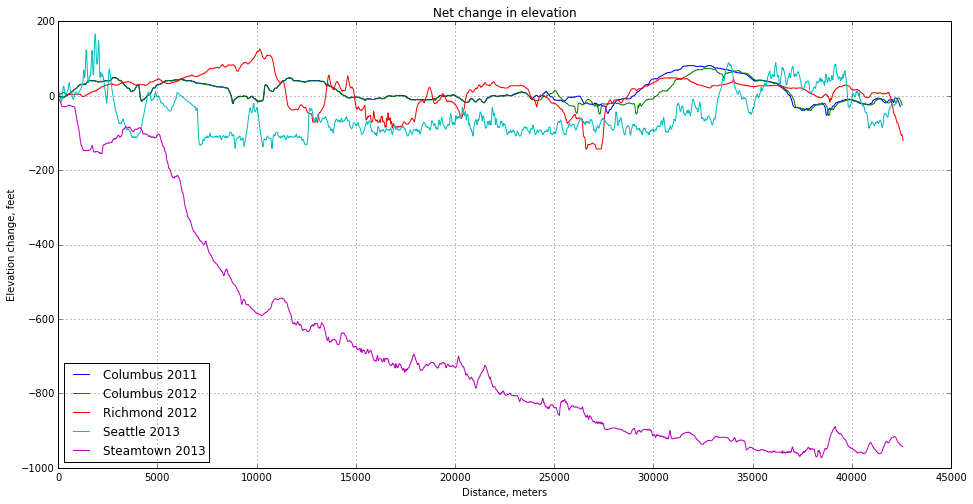

In [6]:
fig, ax = plt.subplots()
names = []
for name in sorted(races):
    names.append(name)
    race = races[name]
    ax.plot(race.distance, race.elevation - race.elevation[0])
ax.grid(b=True)
ax.legend(names, loc='best')
ax.set_title('Net change in elevation')
ax.set_ylabel('Elevation change, feet')
ax.set_xlabel('Distance, meters')
fig.set_size_inches(16, 8)

/Users/mark/conda/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide


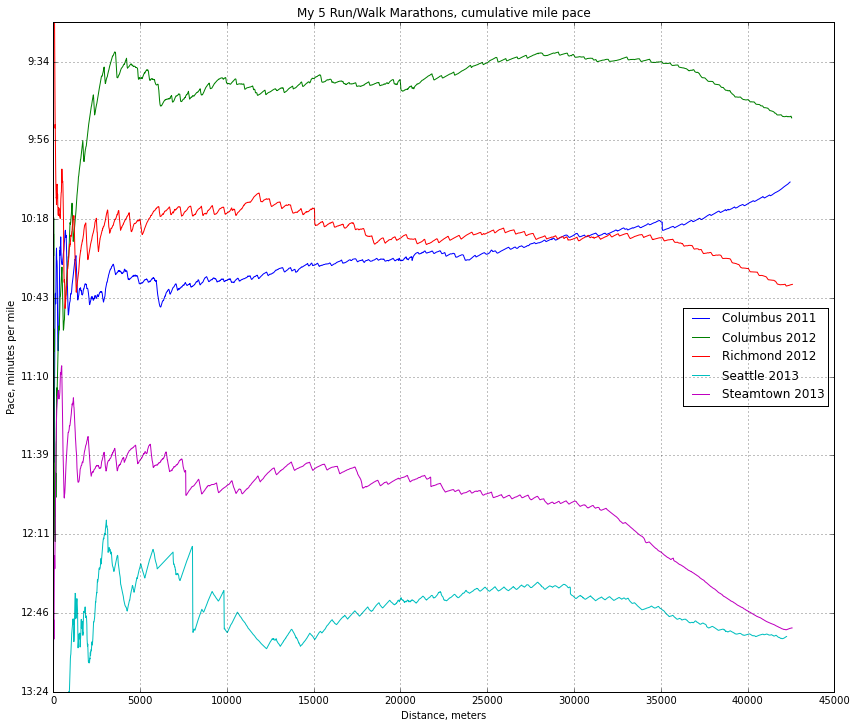

In [7]:
def fmt_speed(x, pos):
    seconds_per_mile = 1/D(m=x).mi
    return '%d:%02d' % divmod(seconds_per_mile, 60)

fig, ax = plt.subplots()
names = []
for name in sorted(races):
    names.append(name)
    race = races[name]
    line, = ax.plot(race.distance, race.distance / race.elapsed)
ax.set_ylim(2.0, 2.85)
ax.grid(b=True)
ax.legend(names, loc='best')
ax.yaxis.set_major_formatter(FuncFormatter(fmt_speed))
ax.set_ylabel('Pace, minutes per mile')
ax.set_xlabel('Distance, meters')
fig.set_size_inches(14, 12)
ax.set_title('My 5 Run/Walk Marathons, cumulative mile pace');